In [8]:
using QuadGK,Plots;
import PyPlot;

In [2]:
# plotlyjs();
# gr();
plotly();

In [3]:
function f(z0)
    res=zero(ComplexF64)
    try
        res=quadgk(z->1/(z-z0+im*eps()),-1,1)[1]
    catch
        res=NaN+im*NaN
    end
    return res
end

f (generic function with 1 method)

In [4]:
let rv=collect(-100:1:100),iv=collect(-100:1:100)
    resv=[f(r+im*i) for i in iv,r in rv]
    p1=plot(rv,iv,real.(resv),st=:surface,zlims=(-0.05,0.05),legend=:false)
    p2=plot(rv,iv,imag.(resv),st=:surface,zlims=(-0.05,0.05),legend=:false)
    plot(p1,p2,layout=(1,2),size=(700,350))
end

In [7]:
@which surface

Plots

In [48]:
function f1(z0)
    res=zero(ComplexF64)
    try
        res+=quadgk(z->1/(z-z0+im*0.00000001),-1,-1-10000*im)[1]
        res+=quadgk(z->1/(z-z0+im*0.00000001),-1-10000*im,1-10000*im)[1]
        res+=quadgk(z->1/(z-z0+im*0.00000001),1-10000*im,1)[1]
    catch
        res=NaN+im*NaN
    end
    return res
end

f1 (generic function with 1 method)

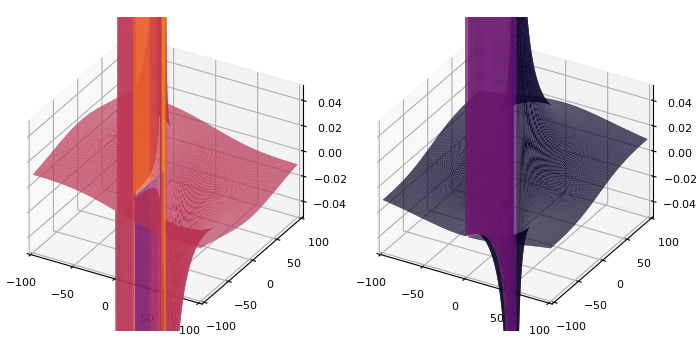

In [49]:
let rv=collect(-100:1:100),iv=collect(-100:1:100)
    resv=[f1(r+im*i) for i in iv,r in rv]
    p1=surface(rv,iv,real.(resv),zlims=(-0.05,0.05),legend=:false)
    p2=surface(rv,iv,imag.(resv),zlims=(-0.05,0.05),legend=:false)
    plot(p1,p2,layout=(1,2),size=(700,350))
end